# Proyek Analisis Data: Nama dataset
- Nama: Muchammad Muchib Zainul Fikry
- Email: muchammadmuchib@gmail.com
- Id Dicoding : muchibzainul

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Berapa nilai kenaikan tertingi sensor humidity dalam 1 bulan ?
- pertanyaan 2 : Apakah terdapat duplikasi data pada saat analisa tahap gathering ?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
#Install python version
#pip install jupyter
#pip install matplotlib
#pip install seaborn
#pip install streamlit

## Data Wrangling

### Gathering Data

In [4]:
import pandas as pd
import sqlalchemy as sqla

db = pd.read_csv("data/hour.csv", delimiter=",")
print(db)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

### Assessing Data

In [5]:
db.duplicated().sum()

0

In [6]:
db.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [21]:
data = db.drop_duplicates(inplace=True)
print(data)

None


## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
db.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [52]:
db.groupby(by="temp").agg({
    "instant": "unique",
    "hum": ["max", "min", "mean", "std"]
})

instant   hum                  \
                                                 unique   max   min      mean   
temp                                                                            
0.02  [484, 485, 486, 487, 505, 506, 529, 530, 531, ...  0.62  0.34  0.455882   
0.04  [480, 481, 482, 483, 488, 489, 502, 503, 504, ...  0.57  0.38  0.473125   
0.06  [478, 479, 490, 491, 499, 500, 501, 510, 525, ...  0.62  0.38  0.440000   
0.08  [190, 191, 193, 477, 492, 497, 498, 509, 524, ...  0.79  0.35  0.494706   
0.10  [185, 186, 187, 188, 189, 192, 194, 214, 215, ...  0.74  0.33  0.498039   
0.12  [74, 75, 76, 182, 183, 184, 195, 209, 210, 211...  0.93  0.28  0.517500   
0.14  [52, 53, 54, 68, 72, 73, 77, 120, 121, 180, 18...  0.93  0.26  0.576232   
0.16  [50, 51, 55, 70, 71, 78, 79, 94, 95, 117, 118,...  1.00  0.26  0.639826   
0.18  [56, 67, 69, 99, 114, 116, 124, 158, 159, 160,...  0.93  0.26  0.600581   
0.20  [8, 49, 57, 65, 66, 92, 93, 98, 100, 113, 115,...  1.00  0.21  0.598785   
0.22  [2, 3, 7, 47, 48, 58, 80, 81, 90, 91, 97, 101,...  1.00  0.25  0.640523   
0.24  [1, 4, 5, 6, 9, 46, 59, 63, 64, 82, 88, 89, 96...  1.00  0.21  0.662950   
0.26  [45, 60, 61, 62, 83, 87, 103, 104, 127, 128, 1...  1.00  0.22  0.615814   
0.28  [84, 86, 105, 129, 130, 338, 363, 419, 443, 44...  1.00  0.24  0.613987   
0.30  [44, 85, 106, 107, 108, 339, 343, 347, 348, 42...  1.00  0.22  0.611872   
0.32  [10, 43, 340, 342, 344, 345, 346, 427, 428, 42...  1.00  0.21  0.604959   
0.34  [39, 40, 41, 341, 426, 725, 730, 818, 819, 820...  1.00  0.00  0.594698   
0.36  [12, 34, 35, 36, 37, 38, 42, 425, 728, 729, 84...  1.00  0.00  0.633800   
0.38  [11, 33, 424, 726, 727, 845, 982, 993, 994, 10...  1.00  0.00  0.635000   
0.40  [21, 22, 23, 31, 32, 421, 422, 423, 983, 984, ...  1.00  0.00  0.647003   
0.42  [13, 17, 19, 20, 27, 30, 985, 986, 1052, 1094,...  1.00  0.00  0.633796   
0.44  [16, 18, 26, 1003, 1074, 1087, 1088, 1089, 109...  1.00  0.00  0.651519   
0.46  [14, 15, 24, 25, 28, 29, 1010, 1053, 1054, 105...  1.00  0.14  0.677317   
0.48  [1075, 1082, 1083, 1111, 1308, 1448, 1450, 145...  1.00  0.12  0.640972   
0.50  [1085, 1099, 1375, 1379, 1725, 1727, 1729, 173...  1.00  0.18  0.633540   
0.52  [1004, 1009, 1084, 1110, 1256, 1324, 1376, 172...  1.00  0.08  0.666871   
0.54  [1076, 1081, 1109, 1257, 1258, 1377, 1378, 174...  1.00  0.10  0.679895   
0.56  [1005, 1008, 1079, 1259, 1325, 1326, 1748, 176...  1.00  0.19  0.667910   
0.58  [1006, 1080, 1108, 1761, 1826, 2330, 2334, 248...  1.00  0.19  0.669475   
0.60  [1007, 1077, 1078, 1100, 1107, 1759, 1760, 215...  1.00  0.15  0.687600   
0.62  [1106, 1756, 1757, 1758, 2164, 2165, 2331, 233...  1.00  0.17  0.700716   
0.64  [1105, 1749, 2152, 2163, 2320, 2329, 2493, 263...  0.94  0.19  0.686214   
0.66  [1101, 1102, 1103, 1104, 1750, 1755, 2328, 253...  0.94  0.24  0.696277   
0.68  [1751, 1752, 1754, 2153, 2162, 2327, 2543, 263...  0.89  0.22  0.678567   
0.70  [1753, 2159, 2160, 2161, 2535, 2536, 2542, 263...  0.89  0.21  0.643812   
0.72  [2158, 2321, 2325, 2326, 2657, 2681, 2851, 316...  0.84  0.23  0.601211   
0.74  [2154, 2157, 2322, 2323, 2324, 2537, 2540, 254...  0.84  0.22  0.571705   
0.76  [2155, 2156, 2538, 2539, 3351, 3378, 3423, 342...  0.79  0.20  0.536717   
0.78  [3352, 3353, 3399, 3406, 3426, 3515, 3526, 352...  0.79  0.24  0.518935   
0.80  [3403, 3404, 3405, 3493, 3516, 3568, 3570, 357...  0.75  0.21  0.478800   
0.82  [3400, 3401, 3402, 3494, 3517, 3542, 3549, 369...  0.75  0.17  0.459906   
0.84  [3524, 3525, 3710, 3732, 3742, 3759, 3760, 376...  0.71  0.20  0.436884   
0.86  [3495, 3496, 3500, 3501, 3518, 3519, 3543, 354...  0.67  0.19  0.417786   
0.88  [3497, 3498, 3499, 3711, 3741, 4291, 4532, 469...  0.56  0.22  0.358491   
0.90  [3520, 3521, 3522, 3523, 3544, 3545, 3546, 371...  0.53  0.24  0.362556   
0.92  [3713, 3714, 3715, 3716, 3735, 3737, 3739, 474...  0.48  0.16  0.347143   
0.94  [3738, 4767, 4768, 4770, 4792, 4794, 4795, 479...  0.51  0.29  0.379412  

## Visualization & Explanatory Analysis

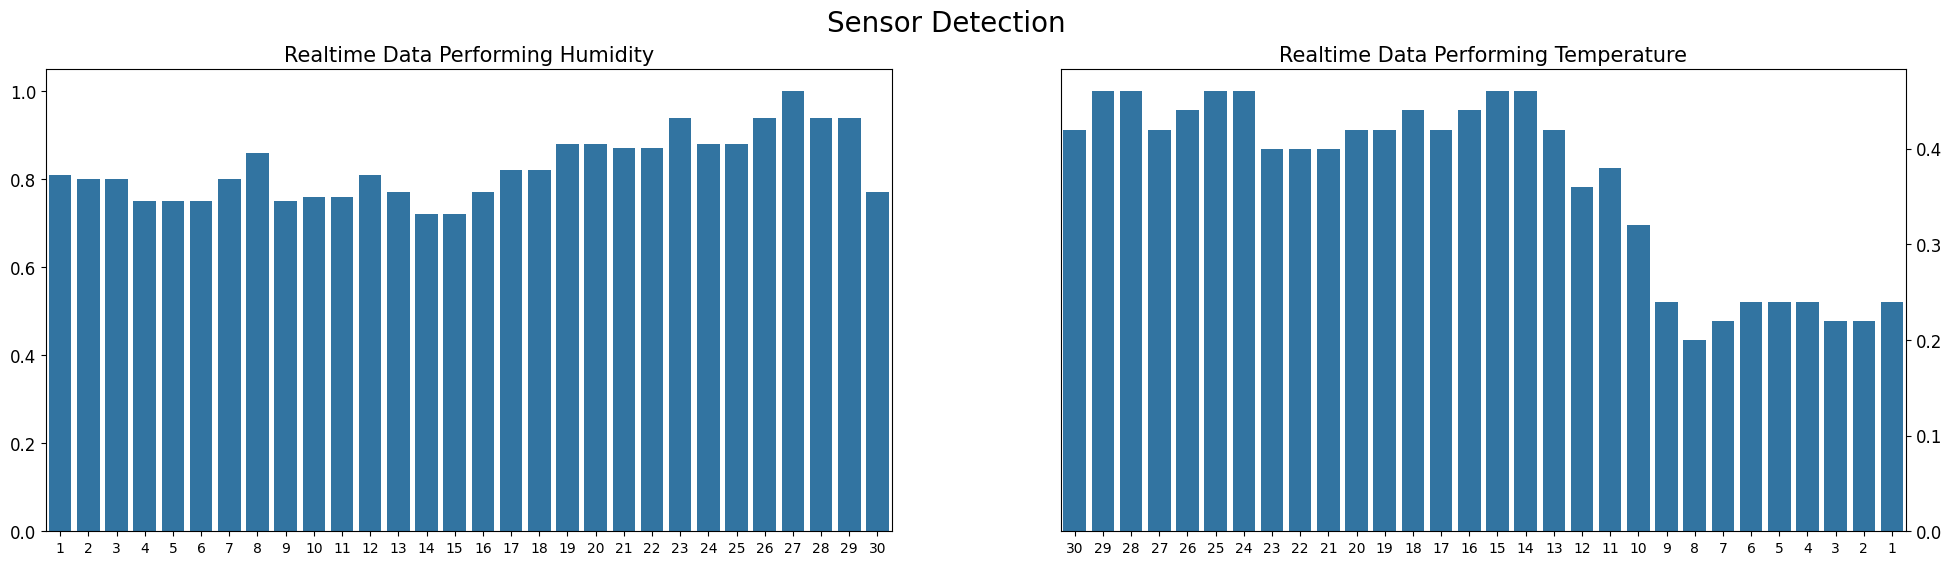

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.barplot(x="instant", y="hum", data=db.head(30), palette=None, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Realtime Data Performing Humidity", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="instant", y="temp", data=db.sort_values(by="instant", ascending=True).head(30), palette=None, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Realtime Data Performing Temperature", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

plt.suptitle("Sensor Detection", fontsize=20)
plt.show()

#Keterangan grafik sumbu X gambar dibawah merupakan day dihitung dari awal bulan sampai akhir bulan.
#Keterangan grafik sumbu Y gambar dibawah merupakan nilai derajat temperature dan humidity.

### Jawaban dari Pertanyaan 1: 

In [ ]:
kenaikan pada nilai sensor humidity di hari ke 27 mengalami kenaikan tertingi mencapai 1.0 derajat celcius

### Jawaban dari Pertanyaan 2: 

In [ ]:
selama proses wrangling pada tahap gathering data kemudian melakukan accessing menggunakan modul duplicated() tidak ada data yang terduplikasi.

## Conclusion

- Conclution pertanyaan 1 : Dari visualisasi grafik tersebut menunjukan terjadi kenaikan mencapai nilai max yaitu 1.0
- conclution pertanyaan 2 : Sebelum proses assesing data dilakukan gathering data agar pengambilan data dari sumber yang tepat dan terpercaya.